# Lecture 3

*Date:* Sept 9, 2024

We'll do some examples involving basic programming with Python. If you want to get better at Python one way is to do some coding challenges, e.g., at [HackerRank](https://www.hackerrank.com/domains/python).


## Review of symbolic equation solving

**Example:** Given two lines determined by slopes and $y$-intercepts, find the point of intersection.

$$y = m_1x +b_1$$
$$y = m_2x +b_2$$


In [1]:
var('x y m1 m2 b1 b2')
eq1 = y == m1*x+b1
eq1

y == m1*x + b1

In [2]:
eq2 = y == m2*x+b2
eq2

y == m2*x + b2

In [3]:
sol = solve([eq1, eq2], [x, y], solution_dict=True)
sol

[{x: -(b1 - b2)/(m1 - m2), y: (b2*m1 - b1*m2)/(m1 - m2)}]

In [5]:
sol[0]

{x: -(b1 - b2)/(m1 - m2), y: (b2*m1 - b1*m2)/(m1 - m2)}

In [6]:
sol[0][x]

-(b1 - b2)/(m1 - m2)

In [7]:
sol[0][y]

(b2*m1 - b1*m2)/(m1 - m2)

## Python functions

Python functions are the main components of a Python or Sage program. They allow us to implement algorithms to solve problems in a general context.

This topic will be revisited. At this point, I just want you to understand that a python function:
* has a name
* has a list of variables with names
* has a list of statements to execute. Any variables created can be used within the function (but typically not outside the function).
* has a return statement that gives the &ldquo;result&rdquo; of the calculation.

The syntax of a python function is typically:
```python
def function_name(variable1, variable2):
    # statement 1
    # statement 2
    # ...
    return result
```

The word `def` above indicates we will define a function. The statements of a function should be indented the same amount. Execution of a function ends when a `return` statement is hit and `result` (whatever is after `return`) is the output of the function.

We'll cover Python functions in more detail in the future. I mainly want them now so that you can work at the level of algorithms as opposed to individual calculations.


### Problem 1:

Write a function which takes a slope $m$ and a $y$-intercept $b$ and returns a sage function for the line, $y(x)$.


In [8]:
y(x) = m1 * x + b1

In [10]:
y

x |--> m1*x + b1

In [11]:
def line_formula(m, b):
    y(x) = m * x + b
    return y

In [12]:
line_formula(3, 2)

x |--> 3*x + 2

### Problem 2:
Write a function which given slopes and $y$-intercepts for two lines, returns the point of intersection as a pair of coordinates.

In [13]:
def intersection(m1, b1, m2, b2):
    x = -(b1 - b2)/(m1 - m2)
    y = (b2*m1 - b1*m2)/(m1 - m2)
    return (x, y)

In [15]:
intersection(0, 0, 1, 0)

(0, 0)

In [17]:
intersection(1, 2, 3, 4)

(-1, 1)

In [19]:
show(line_formula(1,2))

x |--> x + 2

In [20]:
show(line_formula(3,4))

x |--> 3*x + 4

## Symbolic functions versus Python functions

Here are two implementations of the function $(x, y) \mapsto y e^x$. The first is a symbolic function:

In [21]:
f(x,y) = y*e^x

Here is the same as a Python function:

In [22]:
def g(x, y):
    return y*e^x

Note we can differentiate the symbolic function but not differentiate the Python function:

In [23]:
f.derivative()

(x, y) |--> (y*e^x, e^x)

In [24]:
g.derivative()

AttributeError: 'function' object has no attribute 'derivative'

On the other hand, it is possible to do much more things with a Python function.

For example, the *Collatz problem* involves repeatedly applying the following function on positive integers:
$$k \mapsto \begin{cases} k/2 & \text{if $k$ is even,} \\
3k+1 & \text{if $k$ is odd.} \end{cases}$$
The *Collatz conjecture* states eventually all natural numbers reach $1$ (and therefore continue in the repeating pattern $1 \mapsto 4 \mapsto 2 \mapsto 1$).

In [25]:
36

36

In [26]:
18

18

In [29]:
9

9

In [30]:
28

28

In [31]:
14

14

In [32]:
7

7

In [33]:
22

22

In [34]:
11

11

In [35]:
34

34

In [36]:
17

17

In [37]:
17*3+1

52

In [38]:
13

13

In [39]:
13*3+1

40

In [41]:
5

5

In [42]:
16

16

In [43]:
1

1

In [44]:
4

4

In [ ]:
1

In [46]:
def collatz(k, n):
    for i in range(n): # Repeat the indented block n times:
        if k % 2 == 0:
            k = k / 2  # If k is even, we update the value of k to be k/2
        else:
            k = 3*k + 1 # If odd, we update the value to be 3*k+1.
    return k

In [50]:
collatz(1792, 100)

4

In [51]:
collatz(17927, 100)

2

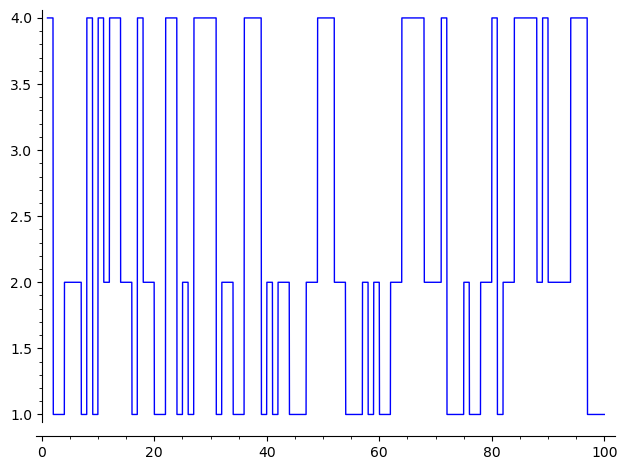

In [52]:
k = var('k')
plot(lambda k:collatz(floor(k), 1000), (k, 1, 100), plot_points=100)

For more on Python functions, see \S 3.2.3 of *Computational Mathematics with Sage*.

## Printing and strings

You create a string by enclosing text in single or double quotes.

In [53]:
s = 'Hi!'
s

'Hi!'

In [54]:
ss = "Bob says 'good'."
ss

"Bob says 'good'."

You can concatenate strings using `+` and add to a string using `+=`.

In [55]:
s + ss

"Hi!Bob says 'good'."

Sage objects can be converted to strings using the `str()` function:

In [56]:
y = line_formula(5, pi)
y

x |--> pi + 5*x

In [57]:
str(y)

'x |--> pi + 5*x'

This is also how Sage prints out an object produced at the end of a code block:

To embed sage objects into a string, I like to use *f-strings*. Here you enclose a string as before but start with an f, e.g., `f'string'`. But, things in the string that are enclosed in curly brackets are automatically converted to strings. For example:

In [64]:
p = 17

In [65]:
f'p = {p}'

'p = 17'

In [66]:
'p = '+str(p)

'p = 17'

I find print statements useful for providing information that is not shown as the end result of a code block.

In [62]:
def collatz(k, n):
    for i in range(n): # Repeat the indented block n times:
        print(f'In step {i} the value of k is {k}')
        if k % 2 == 0:
            k = k / 2  # If k is even, we update the value of k to be k/2
        else:
            k = 3*k + 1 # If odd, we update the value to be 3*k+1.
    return k

In [63]:
collatz(2024, 10)

In step 0 the value of k is 2024
In step 1 the value of k is 1012
In step 2 the value of k is 506
In step 3 the value of k is 253
In step 4 the value of k is 760
In step 5 the value of k is 380
In step 6 the value of k is 190
In step 7 the value of k is 95
In step 8 the value of k is 286
In step 9 the value of k is 143


430

## If statements

If statements allow you to run a code block only if some expression is `True`.

In [67]:
n = 17
if n % 2 == 0:
    print(n^2)

In [68]:
n = 18
if n % 2 == 0:
    print(n^2)

324


More generally we have the following syntax:
```python
if A:
    block_run_if_A_is_true
    second_statement_of block
elif B:
    block_run_if_A_is_false_and_B_is_true
elif C:
    block_run_if_A_and_B_are_false_and_C_is_true
else:
    block_run_if_A_B_and_C_are_false

### Problem:

Write a function that prints out whether an integer is a square, or cube, or neither.

In [71]:
sqrt(16) in QQ

True

In [73]:
sqrt(16) in ZZ

True

In [75]:
e^(I*pi) in ZZ

True

In [77]:
e^(I*pi)

-1

In [79]:
sqrt(170052315876) in ZZ

True

In [81]:
def type_of_integer(n):
    if sqrt(n) in ZZ:
        print(f'The number {n} is square')
    elif n^(1/3) in ZZ:
        print(f'The number {n} is a cube')
    else:
        print(f'The number {n} is neither a square nor a cube')

In [83]:
type_of_integer(7)

The number 7 is neither a square nor a cube


In [85]:
type_of_integer(459)

The number 459 is neither a square nor a cube


In [87]:
type_of_integer(8)

The number 8 is a cube


In [90]:
type_of_integer(9)

The number 9 is square


In [92]:
type_of_integer(1)

The number 1 is square


In [94]:
type_of_integer(64)

The number 64 is square


In [96]:
def type_of_integer(n):
    if sqrt(n) in ZZ:
        if n^(1/3) in ZZ:
            print(f'The number {n} is a square and a cube')
        else:
            print(f'The number {n} is square')
    elif n^(1/3) in ZZ:
        print(f'The number {n} is a cube')
    else:
        print(f'The number {n} is neither a square nor a cube')

In [97]:
type_of_integer(64)

The number 64 is a square and a cube


## List-like Containers

### Tuples

Tuples are lists of elements and are constructed using parethesis:

In [99]:
(4, 5)

(4, 5)

In [101]:
tup = (1, 45, 63+1, sqrt(15), 'a')
tup

(1, 45, 64, sqrt(15), 'a')

The length of a tuple is the number of elements. You get it with `len(tup)`.

In [102]:
len(tup)

5

Entries in a tuple are indexed from `0` up through `L-1` where `L` is the length.

In [103]:
tup[2]

64

In [104]:
tup[5]

IndexError: tuple index out of range

Negative indices:

In [106]:
tup[-1]

'a'

In [107]:
tup[-5]

1

If you have a tuple you can do something with each element using a `for` loop. This runs the indented code block on every element in the tuple in turn:

In [108]:
for x in tup:
    print(x+x)

2
90
128
2*sqrt(15)
aa


You can concatenate tuples with `+`:

In [110]:
tup2 = ('hi')
tup2

'hi'

In [113]:
tup2 = ('hi',)
tup2

('hi',)

In [114]:
tup + tup2

(1, 45, 64, sqrt(15), 'a', 'hi')

Tuples can not be modified after construction. Lists are similar but can be modified.

In [118]:
tup = tup + tup2
tup

(1, 45, 64, sqrt(15), 'a', 'hi', 'hi', 'hi', 'hi')

### Ranges

Returns finite &ldquo;lists&rdquo; of consecutive integers, and finite &ldquo;lists&rdquo; of integers that are equally spaced apart.

In [119]:
range(10)

range(0, 10)

In [120]:
tuple(range(10))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [122]:
for i in range(10):
    print(f'THe square of {i} is {i^2}')

THe square of 0 is 0
THe square of 1 is 1
THe square of 2 is 4
THe square of 3 is 9
THe square of 4 is 16
THe square of 5 is 25
THe square of 6 is 36
THe square of 7 is 49
THe square of 8 is 64
THe square of 9 is 81


In [123]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start
(inclusive) to stop (exclusive) by step.  range(i, j) produces i, i+1,
i+2, ..., j-1. start defaults to 0, and stop is omitted!  range(4)
produces 0, 1, 2, 3. These are exactly the valid indices for a list of
4 elements. When step is given, it specifies the increment (or
decrement).
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           
Type:           type
Subclasses:     

Demo of case:
`range(stop) -> range object`

In [124]:
range(5, 10)

range(5, 10)

In [126]:
tuple(range(5, 10))

(5, 6, 7, 8, 9)

In [128]:
tuple(range(1, 10))

(1, 2, 3, 4, 5, 6, 7, 8, 9)

In [130]:
range(10)+1

TypeError: unsupported operand parent(s) for +: '<class 'range'>' and 'Integer Ring'

In [134]:
tuple(range(1, 10, 2))

(1, 3, 5, 7, 9)

In [137]:
tuple(range(10, 1, -2))

(10, 8, 6, 4, 2)

In [139]:
tuple(range(1, 10, 1/2))

TypeError: unable to convert rational 1/2 to an integer

In [141]:
for i in range(1, 20):
    j = i/2
    print(f'j is {j}')


j is 1/2
j is 1
j is 3/2
j is 2
j is 5/2
j is 3
j is 7/2
j is 4
j is 9/2
j is 5
j is 11/2
j is 6
j is 13/2
j is 7
j is 15/2
j is 8
j is 17/2
j is 9
j is 19/2


Demo of cases:
`range(start, stop[, step]) -> range object -> range object`

#### Constructing multiple variables:

### Lists

Lists can be defined with square brackets.

In [142]:
l = [1, 2, 'a']

Element access and modification of lists:

In [143]:
len(l)

3

In [145]:
l[1]

2

In [146]:
l[1] = sqrt(5)
l

[1, sqrt(5), 'a']

Appending

In [147]:
l.append(pi)

In [148]:
l

[1, sqrt(5), 'a', pi]

Construction:

**Example:** Write a function which given `n` produces a list [0^2, 1^2, 2^2, ..., (n-1)^2].


In [151]:
n = 5
l = []
for i in range(n):
    l.append(i^2)
l

[0, 1, 4, 9, 16]

In [153]:
def squares(n):
    l = []
    for i in range(n):
        l.append(i^2)
    return l

In [154]:
squares(10)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

List comprehension:

This is if you want do something complicated in one line...

Here is an [article about list comprehension](https://realpython.com/list-comprehension-python/#filter-values-from-a-list) if you want to learn more. I think you can do everything you want with regular for loops over lists and conditionals (if statements):

In [156]:
n = 5
[i^2 for i in range(n)]

[0, 1, 4, 9, 16]

In [158]:
n = 10
[i^2 for i in range(n) if i%2 == 1]

[1, 9, 25, 49, 81]

Sorting:

In [161]:
l = [sin(i) for i in range(n) if i%2 == 1]
l

[sin(1), sin(3), sin(5), sin(7), sin(9)]

In [162]:
l.sort()

In [163]:
l

[sin(5), sin(3), sin(9), sin(7), sin(1)]

In [164]:
for x in l:
    print(x.n())

-0.958924274663138
0.141120008059867
0.412118485241757
0.656986598718789
0.841470984807897


Slice notation

In [169]:
l = [i^2 for i in range(20)]
l

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

In [170]:
l[5]

25

In [172]:
l[:10]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [174]:
l[2:10]

[4, 9, 16, 25, 36, 49, 64, 81]

In [176]:
l[2:10:2]

[4, 16, 36, 64]

In [178]:
l[10:2:-2]

[100, 64, 36, 16]

## Point2D and Line2D

The `point2d()` function can be used to plot a list of points in the plane. The `line2d()` function does the same, but connects consecutive points with line segments.

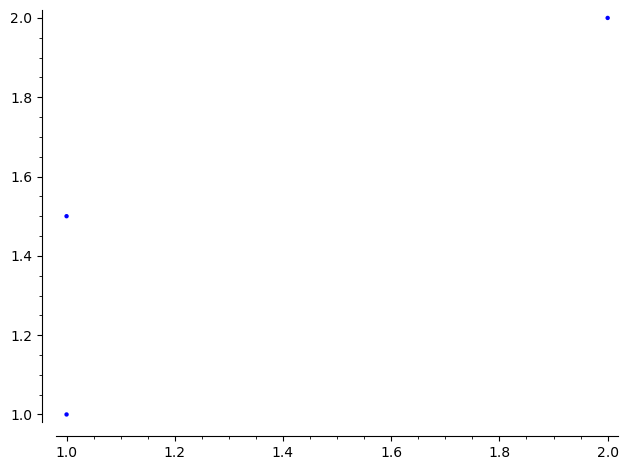

In [181]:
point2d([(1,1),(2,2), (1, 3/2)]) 

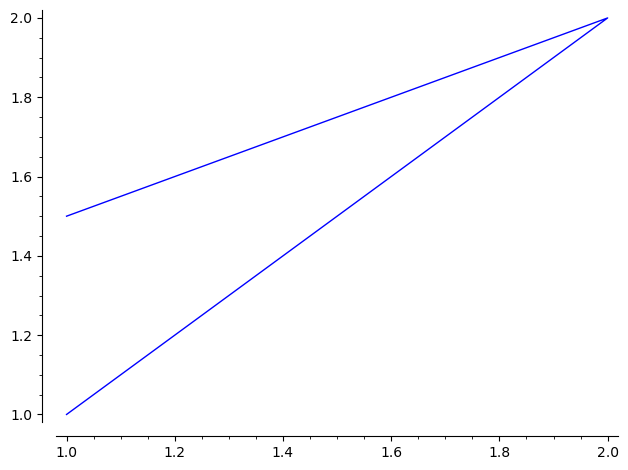

In [183]:
line2d([(1,1),(2,2), (1, 3/2)]) 

If the points are close together, we can use `line2d` to plot a curve. (This can also be done with Sage directly, see the help for `parametric_plot()`.)

In [184]:
x(t) = t*cos(t)
y(t) = t*sin(t)

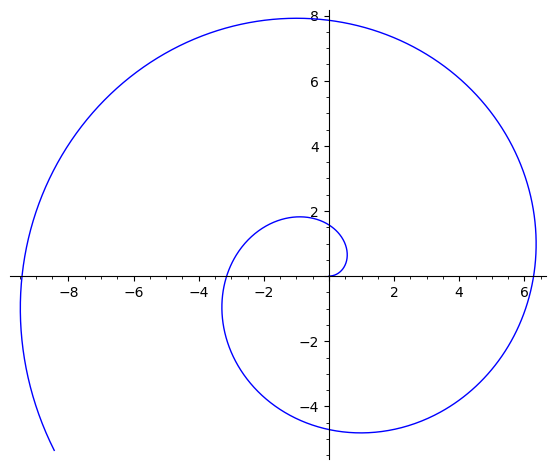

In [188]:
points = []
for i in range(1000):
    t = i / 100
    points.append( (x(t), y(t)) )
line2d(points, aspect_ratio=1)